In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('./data/layer_324.csv')

data.head()

,t,x,y,z,layer_id,sensor0,sensor1,temp,track_id,track_orient,pos_rel,t_rel
0,127300340.0,26.035,-66.386,12.96,324,800.0,795.0,1594.7,0,131,0.00000,0.0
1,127300350.0,26.043,-66.392,12.96,324,798.0,794.0,1593.3,0,131,0.00821,10.0
2,127300360.0,26.047,-66.398,12.96,324,814.0,799.0,1608.5,0,131,0.01642,20.0
3,127300370.0,26.049,-66.404,12.96,324,829.0,806.0,1619.4,0,131,0.02463,30.0
4,127300380.0,26.057,-66.412,12.96,324,833.0,824.0,1599.8,0,131,0.03284,40.0


In [7]:
print(data.isnull().sum())

t               0
x               0
y               0
z               0
layer_id        0
sensor0         0
sensor1         0
temp            0
track_id        0
track_orient    0
pos_rel         0
t_rel           0
dtype: int64


c:\Users\Utente\anaconda3\envs\qda_environment\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 12.96 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Utente\anaconda3\envs\qda_environment\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 324.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Utente\anaconda3\envs\qda_environment\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 131.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Utente\anaconda3\envs\qda_environment\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 12.96 results in singular transformati

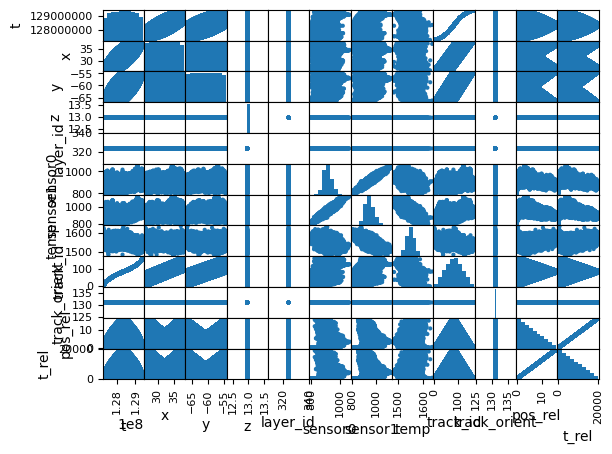

In [3]:
# Create a correlation plot of the dataset
pd.plotting.scatter_matrix(data, alpha = 1)
plt.show()

In [5]:
data_std = (data - data.mean()) / data.std()
data_std.describe()

,t,x,y,z,layer_id,sensor0,sensor1,temp,track_id,track_orient,pos_rel,t_rel
count,1.805380e+05,1.805380e+05,1.805380e+05,1.805380e+05,0.0,1.805380e+05,1.805380e+05,1.805380e+05,1.805380e+05,0.0,1.805380e+05,1.805380e+05
mean,5.993914e-15,-7.150804e-14,4.128462e-14,9.999972e-01,NaN,-3.580021e-14,4.850864e-14,9.186937e-13,-3.813787e-14,NaN,4.227135e-15,7.826929e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,2.420626e-12,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00
min,-1.809517e+00,-1.746063e+00,-1.750440e+00,9.999972e-01,NaN,-4.174128e+00,-4.003540e+00,-4.228980e+00,-2.412274e+00,NaN,-1.421792e+00,-1.421744e+00
25%,-8.511271e-01,-8.661526e-01,-8.659297e-01,9.999972e-01,NaN,-6.849015e-01,-6.993389e-01,-6.814486e-01,-7.119469e-01,NaN,-8.482571e-01,-8.479404e-01
50%,4.357013e-03,-8.718235e-06,-1.104621e-04,9.999972e-01,NaN,-8.574140e-02,-7.492307e-02,-6.018123e-03,8.530573e-03,NaN,-1.681540e-01,-1.674296e-01
75%,8.536757e-01,8.658483e-01,8.662839e-01,9.999972e-01,NaN,6.191528e-01,6.275448e-01,6.694123e-01,7.290080e-01,NaN,7.153618e-01,7.144157e-01
max,1.796489e+00,1.761533e+00,1.754532e+00,9.999972e-01,NaN,5.271454e+00,4.660231e+00,5.257472e+00,2.429335e+00,NaN,2.578871e+00,2.578774e+00


In [11]:
data_std = data.drop(columns=['layer_id', 'track_orient'])

In [ ]:
data_std

In [12]:
# import the libraries for PCA
from sklearn.decomposition import PCA

# Create the PCA object
pca_std = PCA()
# Fit the PCA object to the data
pca_std.fit(data_std)
# Print the eigenvalues
print("Eigenvalues \n", pca_std.explained_variance_)
# Print the eigenvectors
print("\nEigenvectors \n", pca_std.components_)
# Print the explained variance ratio
print("\nExplained variance ratio \n", pca_std.explained_variance_ratio_)
# Print the cumulative explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca_std.explained_variance_ratio_))


Eigenvalues 
 [3.39051682e+11 2.46684677e+07 1.69831871e+03 2.11168760e+02
 1.92113681e+01 1.19068003e+01 1.95478846e-01 2.78860130e-04
 9.56895301e-06 2.65004745e-30]

Eigenvectors 
 [[-9.99999995e-01 -4.52228757e-06 -3.83996172e-06  1.57622753e-35
  -1.65346781e-05 -2.70894953e-05  1.07161037e-05 -5.91178000e-05
  -7.21310207e-08 -6.61561605e-05]
 [-6.60436413e-05 -6.16186962e-06 -1.08841809e-06  9.58070168e-36
  -1.75897686e-03 -2.60945844e-03  8.59589402e-04 -5.39145458e-05
   8.03100259e-04  9.99994353e-01]
 [ 3.35970995e-05  5.19752719e-04 -1.25937763e-03  1.04524700e-31
  -5.82040555e-01 -7.87533711e-01  2.02456960e-01 -4.26448722e-03
   4.71655758e-06 -3.25311024e-03]
 [ 6.50992599e-06 -1.18106154e-02  9.65717371e-03  1.80411242e-16
   5.35655702e-01 -1.84041471e-01  8.23592956e-01 -2.57591644e-02
   2.89438226e-05 -2.47469629e-04]
 [-5.84181100e-05 -2.66049184e-02  1.80981096e-01  5.55111512e-17
   8.88926182e-03 -6.81801445e-03  2.09312033e-02  9.82839688e-01
  -7.37671359e-0

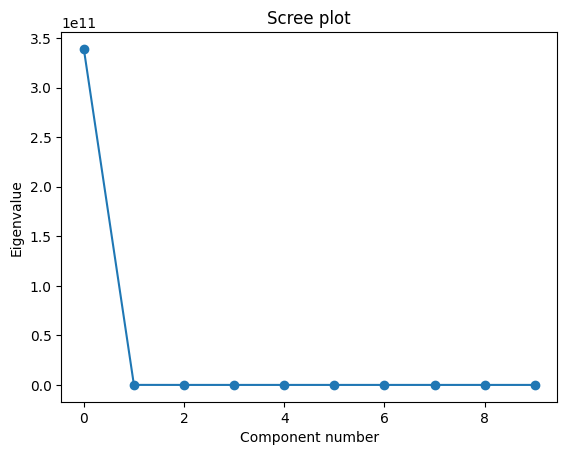

In [13]:
# Plot the eigenvalues (scree plot)
plt.plot(pca_std.explained_variance_, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()